Solución cerrada (beta): Intercepto = 4.2151, Pendiente = 2.9540
Descenso de Gradiente: w = 3.1397, b = 3.0072
Costo Cerrado: 0.8066, Costo Iterativo: 1.2208


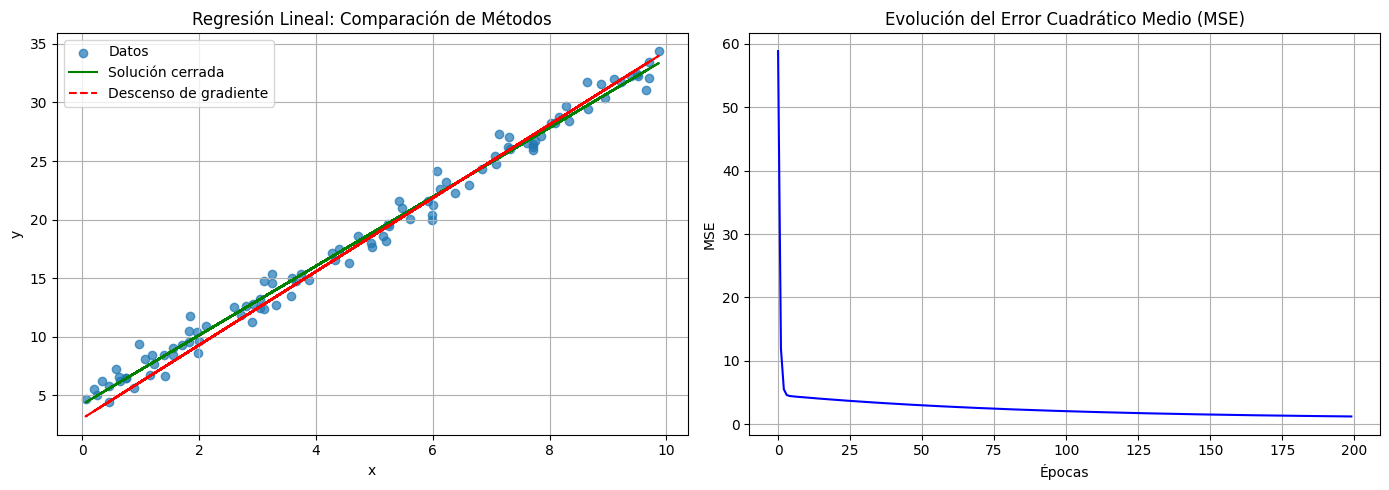


Análisis de complejidad:
- Cálculo cerrado: O(n^2) debido a la inversión de matrices (más costoso para n grande).
- Descenso de gradiente: O(n * epochs), más eficiente para grandes volúmenes de datos.
Por lo tanto, para problemas pequeños el cálculo cerrado es inmediato, pero en grandes volúmenes se prefiere el método iterativo.

Ejecución finalizada.


In [1]:
# importamos librerias

import numpy as np
import matplotlib.pyplot as plt

# Excepción personalizada

class FormatoInvalidoError(Exception):
    """Excepción lanzada si los datos no tienen el formato esperado."""
    pass

# Generación de datos sintéticos

def generar_datos_sinteticos(n=100, intervalo=(0, 10), coeficiente=3, intercepto=4, ruido_std=1, seed=None):
    if seed is not None:
        np.random.seed(seed)
    x = np.random.uniform(intervalo[0], intervalo[1], n)
    ruido = np.random.normal(0, ruido_std, n)
    y = intercepto + coeficiente * x + ruido
    return x.reshape(-1, 1), y.reshape(-1, 1)

# Cálculo cerrado con álgebra matricial

def resolver_modelo_cerrado(x, y):
    try:
        X = np.hstack((np.ones((x.shape[0], 1)), x))
        XtX = X.T @ X
        XtX_inv = np.linalg.inv(XtX)
        beta = XtX_inv @ X.T @ y
    except np.linalg.LinAlgError:
        raise ValueError("La matriz XtX es singular y no se puede invertir.")
    return beta

# Función de costo MSE

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Descenso de gradiente

def gradiente_mse(x, y, w, b):
    n = x.shape[0]
    y_pred = w * x + b
    error = y_pred - y
    dw = (2 / n) * np.sum(x * error)
    db = (2 / n) * np.sum(error)
    return dw, db

def descenso_gradiente(x, y, lr=0.01, epochs=200):
    w, b = 0.0, 0.0
    costos = []
    for epoch in range(epochs):
        dw, db = gradiente_mse(x, y, w, b)
        w -= lr * dw
        b -= lr * db
        y_pred = w * x + b
        costos.append(mse(y, y_pred))
    return w, b, costos

# Visualización comparativa

def graficar_resultados(x, y, beta_cerrado, w_iter, b_iter, costos):
    plt.figure(figsize=(14, 5))

    # Datos y rectas ajustadas
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, label="Datos", alpha=0.7)
    y_cerrado = beta_cerrado[0] + beta_cerrado[1] * x
    y_iterativo = w_iter * x + b_iter
    plt.plot(x, y_cerrado, color='green', label="Solución cerrada")
    plt.plot(x, y_iterativo, color='red', linestyle='--', label="Descenso de gradiente")
    plt.title("Regresión Lineal: Comparación de Métodos")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Evolución de la función de costo
    plt.subplot(1, 2, 2)
    plt.plot(costos, color='blue')
    plt.title("Evolución del Error Cuadrático Medio (MSE)")
    plt.xlabel("Épocas")
    plt.ylabel("MSE")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Comparación de complejidad (comentario)

def analizar_big_o():
    print(
        "\nAnálisis de complejidad:\n"
        "- Cálculo cerrado: O(n^2) debido a la inversión de matrices (más costoso para n grande).\n"
        "- Descenso de gradiente: O(n * epochs), más eficiente para grandes volúmenes de datos.\n"
        "Por lo tanto, para problemas pequeños el cálculo cerrado es inmediato, pero en grandes volúmenes se prefiere el método iterativo.\n"
    )

# Ejecución del sistema completo

try:
    x, y = generar_datos_sinteticos(n=100, seed=42)

    if x.ndim != 2 or y.ndim != 2:
        raise FormatoInvalidoError("Las variables deben estar en formato columna (n, 1).")

    beta_cerrado = resolver_modelo_cerrado(x, y)
    print(f"Solución cerrada (beta): Intercepto = {beta_cerrado[0][0]:.4f}, Pendiente = {beta_cerrado[1][0]:.4f}")
    y_pred_cerrado = beta_cerrado[0] + beta_cerrado[1] * x
    costo_cerrado = mse(y, y_pred_cerrado)

    w_iter, b_iter, costos = descenso_gradiente(x, y, lr=0.01, epochs=200)
    y_pred_iter = w_iter * x + b_iter
    costo_iter = mse(y, y_pred_iter)

    print(f"Descenso de Gradiente: w = {w_iter:.4f}, b = {b_iter:.4f}")
    print(f"Costo Cerrado: {costo_cerrado:.4f}, Costo Iterativo: {costo_iter:.4f}")

    graficar_resultados(x, y, beta_cerrado, w_iter, b_iter, costos)
    analizar_big_o()

except FormatoInvalidoError as e:
    print("Error de formato:", e)

except Exception as e:
    print("Error inesperado:", e)

finally:
    print("Ejecución finalizada.")

## Optimización de un Modelo de Regresión Lineal Mediante Técnicas Matemáticas y Algorítmicas

### Objetivo general

Este proyecto tiene como objetivo implementar y comparar dos enfoques para entrenar un modelo de regresión lineal simple: una solución analítica basada en álgebra matricial (cálculo cerrado), y una solución iterativa mediante descenso de gradiente. Se busca integrar conocimientos de álgebra lineal, cálculo diferencial, programación con Python, optimización y visualización, aplicándolos de forma coherente y justificada.


### 1.- Representación de datos

Se generó un conjunto de datos sintéticos utilizando la relación:  
**y = 4 + 3x + ruido**,  
donde **x** es una variable aleatoria uniforme en el intervalo [0, 10] y el ruido sigue una distribución normal con media 0 y desviación estándar 1. La función `generar_datos_sinteticos` fue parametrizada, reproducible mediante semilla (`np.random.seed`) y devuelta en formato columna.


### 2.- Resolución del modelo – Cálculo cerrado

Se implementó la fórmula normal de regresión lineal:

**β = (XᵗX)^(-1) Xᵗy**

Utilizando `NumPy` para representar matrices, se calculó el vector de parámetros **β = [intercepto, pendiente]**. Se incluyó manejo de excepciones para matrices no invertibles mediante `try-except`.


### 3.- Optimización iterativa – Descenso de gradiente

Se definió la función de costo como el **error cuadrático medio (MSE)**. Posteriormente, se derivó su gradiente con respecto a los parámetros **w** (pendiente) y **b** (intercepto), y se implementó un bucle de descenso de gradiente para minimizar la función.

El algoritmo fue controlado por número de épocas y tasa de aprendizaje, y se registró la evolución del error MSE durante el entrenamiento.


### 4.- Visualización y comparación

Se generaron dos gráficos principales:

- Comparación visual entre la recta obtenida por el método cerrado y por el descenso de gradiente, sobre el mismo conjunto de datos.
- Evolución del MSE a lo largo de las iteraciones del descenso de gradiente, ilustrando la convergencia del modelo.


### 5.- Análisis de complejidad computacional

Se incluyó un análisis comparativo entre los enfoques:

- **Cálculo cerrado:** complejidad computacional **O(n²)**, debido a la inversión de matrices. Eficiente para conjuntos de datos pequeños o medianos.
- **Descenso de gradiente:** complejidad **O(n * epochs)**. Más eficiente y escalable para grandes volúmenes de datos.

Se justifica la elección del método iterativo en contextos donde la matriz de diseño es grande, dispersa o propensa a problemas de singularidad.


### 6. Manejo de excepciones

Se utilizaron bloques `try-except-else-finally` para asegurar una ejecución controlada del programa. Además, se definió una excepción personalizada `FormatoInvalidoError` para verificar que los vectores **x** e **y** tengan el formato adecuado (columnas). Esto refuerza la robustez y la validación temprana de datos.


### 7. Resultados

Los parámetros obtenidos por ambos métodos fueron similares, con diferencias menores atribuibles a la aproximación iterativa. Los valores finales del error MSE también fueron consistentes entre ambas soluciones, validando la correcta implementación.


### Conclusión

Esta evaluación integró los principales contenidos del módulo: manipulación matricial, cálculo diferencial, optimización iterativa y visualización analítica. La comparación entre métodos permitió comprender no solo su funcionamiento, sino también sus implicancias prácticas y computacionales, lo cual es fundamental para aplicaciones en ciencia de datos y aprendizaje automático.